### Student Information
Name:林柏志

Student ID:107033116

GitHub ID:Nickstree

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

### Begin Assignment Here

# 1. First: 
do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__

In [174]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2
# my functions
import helpers.data_mining_helpers as dmh
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import sys

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']


In [4]:
# obtain the documents containing the categories provided

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

In [5]:
# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [6]:
# add category to the dataframe
X['category'] = twenty_train.target

In [7]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

# Answer here


In [8]:
X_test = X.copy()
# reverse and select last 5 rows
print(X_test[::-1][0:5])
print("-"*20)

# replace values with 0 in specific range
X_test.loc[1:2, 'category'] = 0
print(X_test.head(5))
print("-"*20)

# using boolean to query data with specific conditions
print(X_test.loc[X_test['category'] == 0].head(5))
print("-"*20)

# use iloc to select certain rows and columns with list data type
print(X_test.iloc[[2, 8, 12],[0, 2]])
print("-"*20)

# implement query function
print(X_test.query('category_name == "sci.med"'))

                                                   text  category  \
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   

     category_name  
2256       sci.med  
2255       sci.med  
2254       sci.med  
2253       sci.med  
2252       sci.med  
--------------------
                                                text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         0   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         0   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   

            category_name  
0           c

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [9]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [10]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

# Answer here
2, 3, 5 don't have missing values because they still exist as 'str' type instead of real null type.
Thus we should change the missing examples to None or np.nan if we want real null type. 

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

I sampled 1000 data from the original X to X_sample and then changed the first column of X_sample to "None".
By comparing two of the first five data of X and X_sample, I realized that the change on the sampled data would not affect the original one.

In [11]:
X_sample = X.sample(n=1000)
print(X_sample[0:5])
print("-"*20)
X_sample.loc[:, 'text'] = "None"
print(X_sample[0:5])
print("-"*20)
print(X[0:5])

                                                   text  category  \
1306  From: alex@talus.msk.su (Alex Kolesov) Subject...         1   
371   From: johnsh@rpi.edu (Hugh Johnson) Subject: R...         1   
1977  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
1568  From: kilroy@gboro.rowan.edu (Dr Nancy's Sweet...         3   
535   From: keith@cco.caltech.edu (Keith Allan Schne...         0   

               category_name  
1306           comp.graphics  
371            comp.graphics  
1977                 sci.med  
1568  soc.religion.christian  
535              alt.atheism  
--------------------
      text  category           category_name
1306  None         1           comp.graphics
371   None         1           comp.graphics
1977  None         2                 sci.med
1568  None         3  soc.religion.christian
535   None         0             alt.atheism
--------------------
                                                text  category  \
0  From: sd345@city.a

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 


![alt txt](https://i.imgur.com/9eO431H.png)

# Answer here


soc.religion.christian    267
comp.graphics             265
sci.med                   260
alt.atheism               208
Name: category_name, dtype: int64
--------------------
soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64


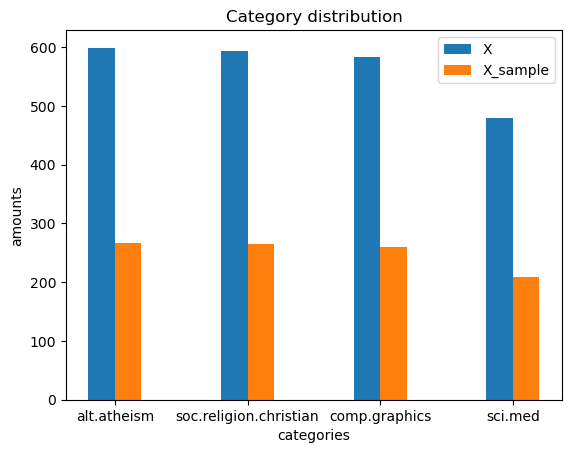

<Figure size 800x300 with 0 Axes>

In [12]:
X_sample_index = X_sample.category_name.value_counts()
print(X_sample_index)
print("-"*20)
X_index = X.category_name.value_counts()
print(X_index)

X_axis = np.arange(len(categories))
X_plt_width = 0.2
plt.bar(X_axis-X_plt_width/2, X_index, X_plt_width, label = 'X')
plt.bar(X_axis+X_plt_width/2, X_sample_index, X_plt_width, label = 'X_sample')
plt.xticks(X_axis, categories)
plt.xlabel('categories')
plt.ylabel('amounts')
plt.title('Category distribution')
plt.legend()
plt.figure(figsize = (8,3))
plt.show()


### 5.2 Feature Creation

In [13]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

### 5.3 Feature subset selection

In [14]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

In [15]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

In [16]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

# Answer here

In [17]:
for i in range(1, 100):
    if X_counts[4, i] == 1:
        print(count_vect.get_feature_names_out()[i])
        break

01


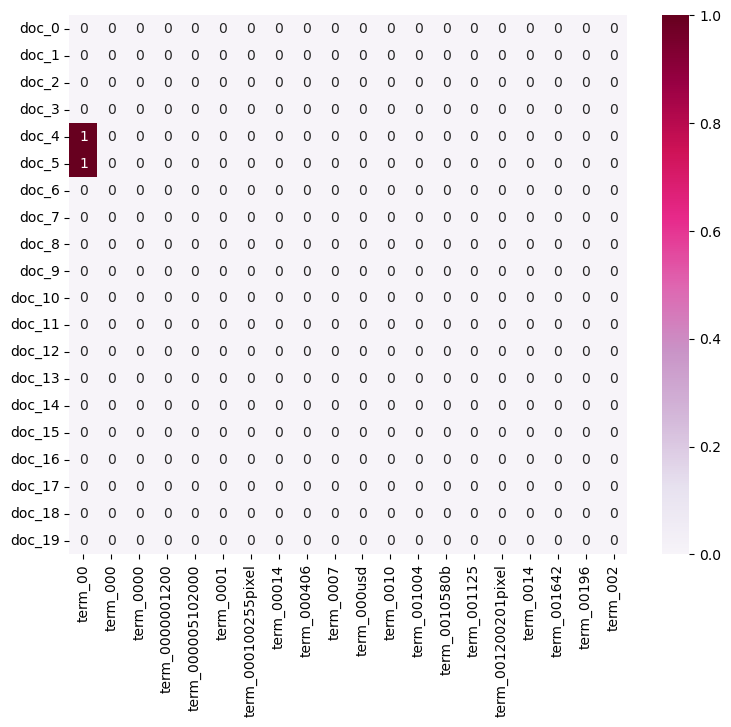

In [18]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

# Answer here


In [19]:
np.asarray(X_counts.sum(axis=1)) # the number of terms of every doc

array([[  98],
       [ 167],
       [ 554],
       ...,
       [ 523],
       [2814],
       [  98]], dtype=int64)

In [20]:
print(len(count_vect.get_feature_names_out())) # total terms number
print(len(X.index)) # total docs number
print('-'*20)

term_sum = np.asarray(X_counts.sum(axis=0))[0] # terms
term_filter = (term_sum>300) & (term_sum <500)

# By trial and error, I found that the term_sum between 250 and 500 are most meaningful.
# Most of the higher frequent terms are just some conjunctions or other useless terms, except for "edu" and "organization"

indexes = []
for i in enumerate(term_filter):
    if i[1] == True:
        indexes.append(i[0])
        print(i[0])
indexes.append(12626) # edu
indexes.append(23915) # organization
print('-'*20)
values = []
for i in indexes:
    values.append(count_vect.get_feature_names_out()[i])
    print(count_vect.get_feature_names_out()[i])



35788
2257
--------------------
242
1102
1341
4017
4471
4486
5110
5203
5340
5714
5718
5906
6024
6371
6557
6561
6744
7005
7062
7643
7800
7965
8544
8559
8609
9093
9338
10037
10699
10736
10752
11520
11904
12052
13400
13511
13521
13567
13908
13952
14212
14277
14819
15511
15545
15837
16409
16418
16470
16913
16999
17854
18585
18880
19218
19841
19924
20167
20342
20373
20463
20517
20770
20825
20903
21332
21732
22379
22918
23161
23264
23363
24024
24108
24188
24481
24895
25234
25337
25642
25646
26085
26093
26169
26948
27049
27065
27088
27103
27504
27749
28089
28760
29134
29455
30117
30180
30808
31394
31710
32135
32249
32332
32570
32989
33256
33860
33875
34214
34660
34956
35168
35255
35358
35587
--------------------
10
1993
20


c:\Users\Nick\.conda\envs\python3.9.6\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


ac
after
again
another
anything
apr
atheism
atheists
available
back
before
better
between
bit
book
both
ca
cannot
case
christ
christians
church
come
computer
course
data
david
day
different
distribution
doesn
etc
every
evidence
example
fact
faith
few
file
free
go
going
group
hell
help
her
however
human
information
its
john
keith
law
least
life
little
ll
long
lot
made
mail
man
mean
might
msg
never
non
nothing
number
others
over
own
part
person
pitt
please
possible
post
probably
problem
program
rather
read
real
really
reason
religion
research
right
says
seems
she
software
someone
still
sure
take
thanks
thing
through
too
truth
uk
used
using
version
want
while
without
work
wrong
years
edu
organization


In [21]:
# plot setting
plot_x = ["term_"+str(i) for i in values]
plot_y = ["doc_"+str(i) for i in list(X.index)[0:20]]
plot_z = []
for i in range(20):
    doc_freq = []
    for j in indexes:
        doc_freq.append(X_counts[i, j])
    plot_z.append(doc_freq)

len(plot_x)

117

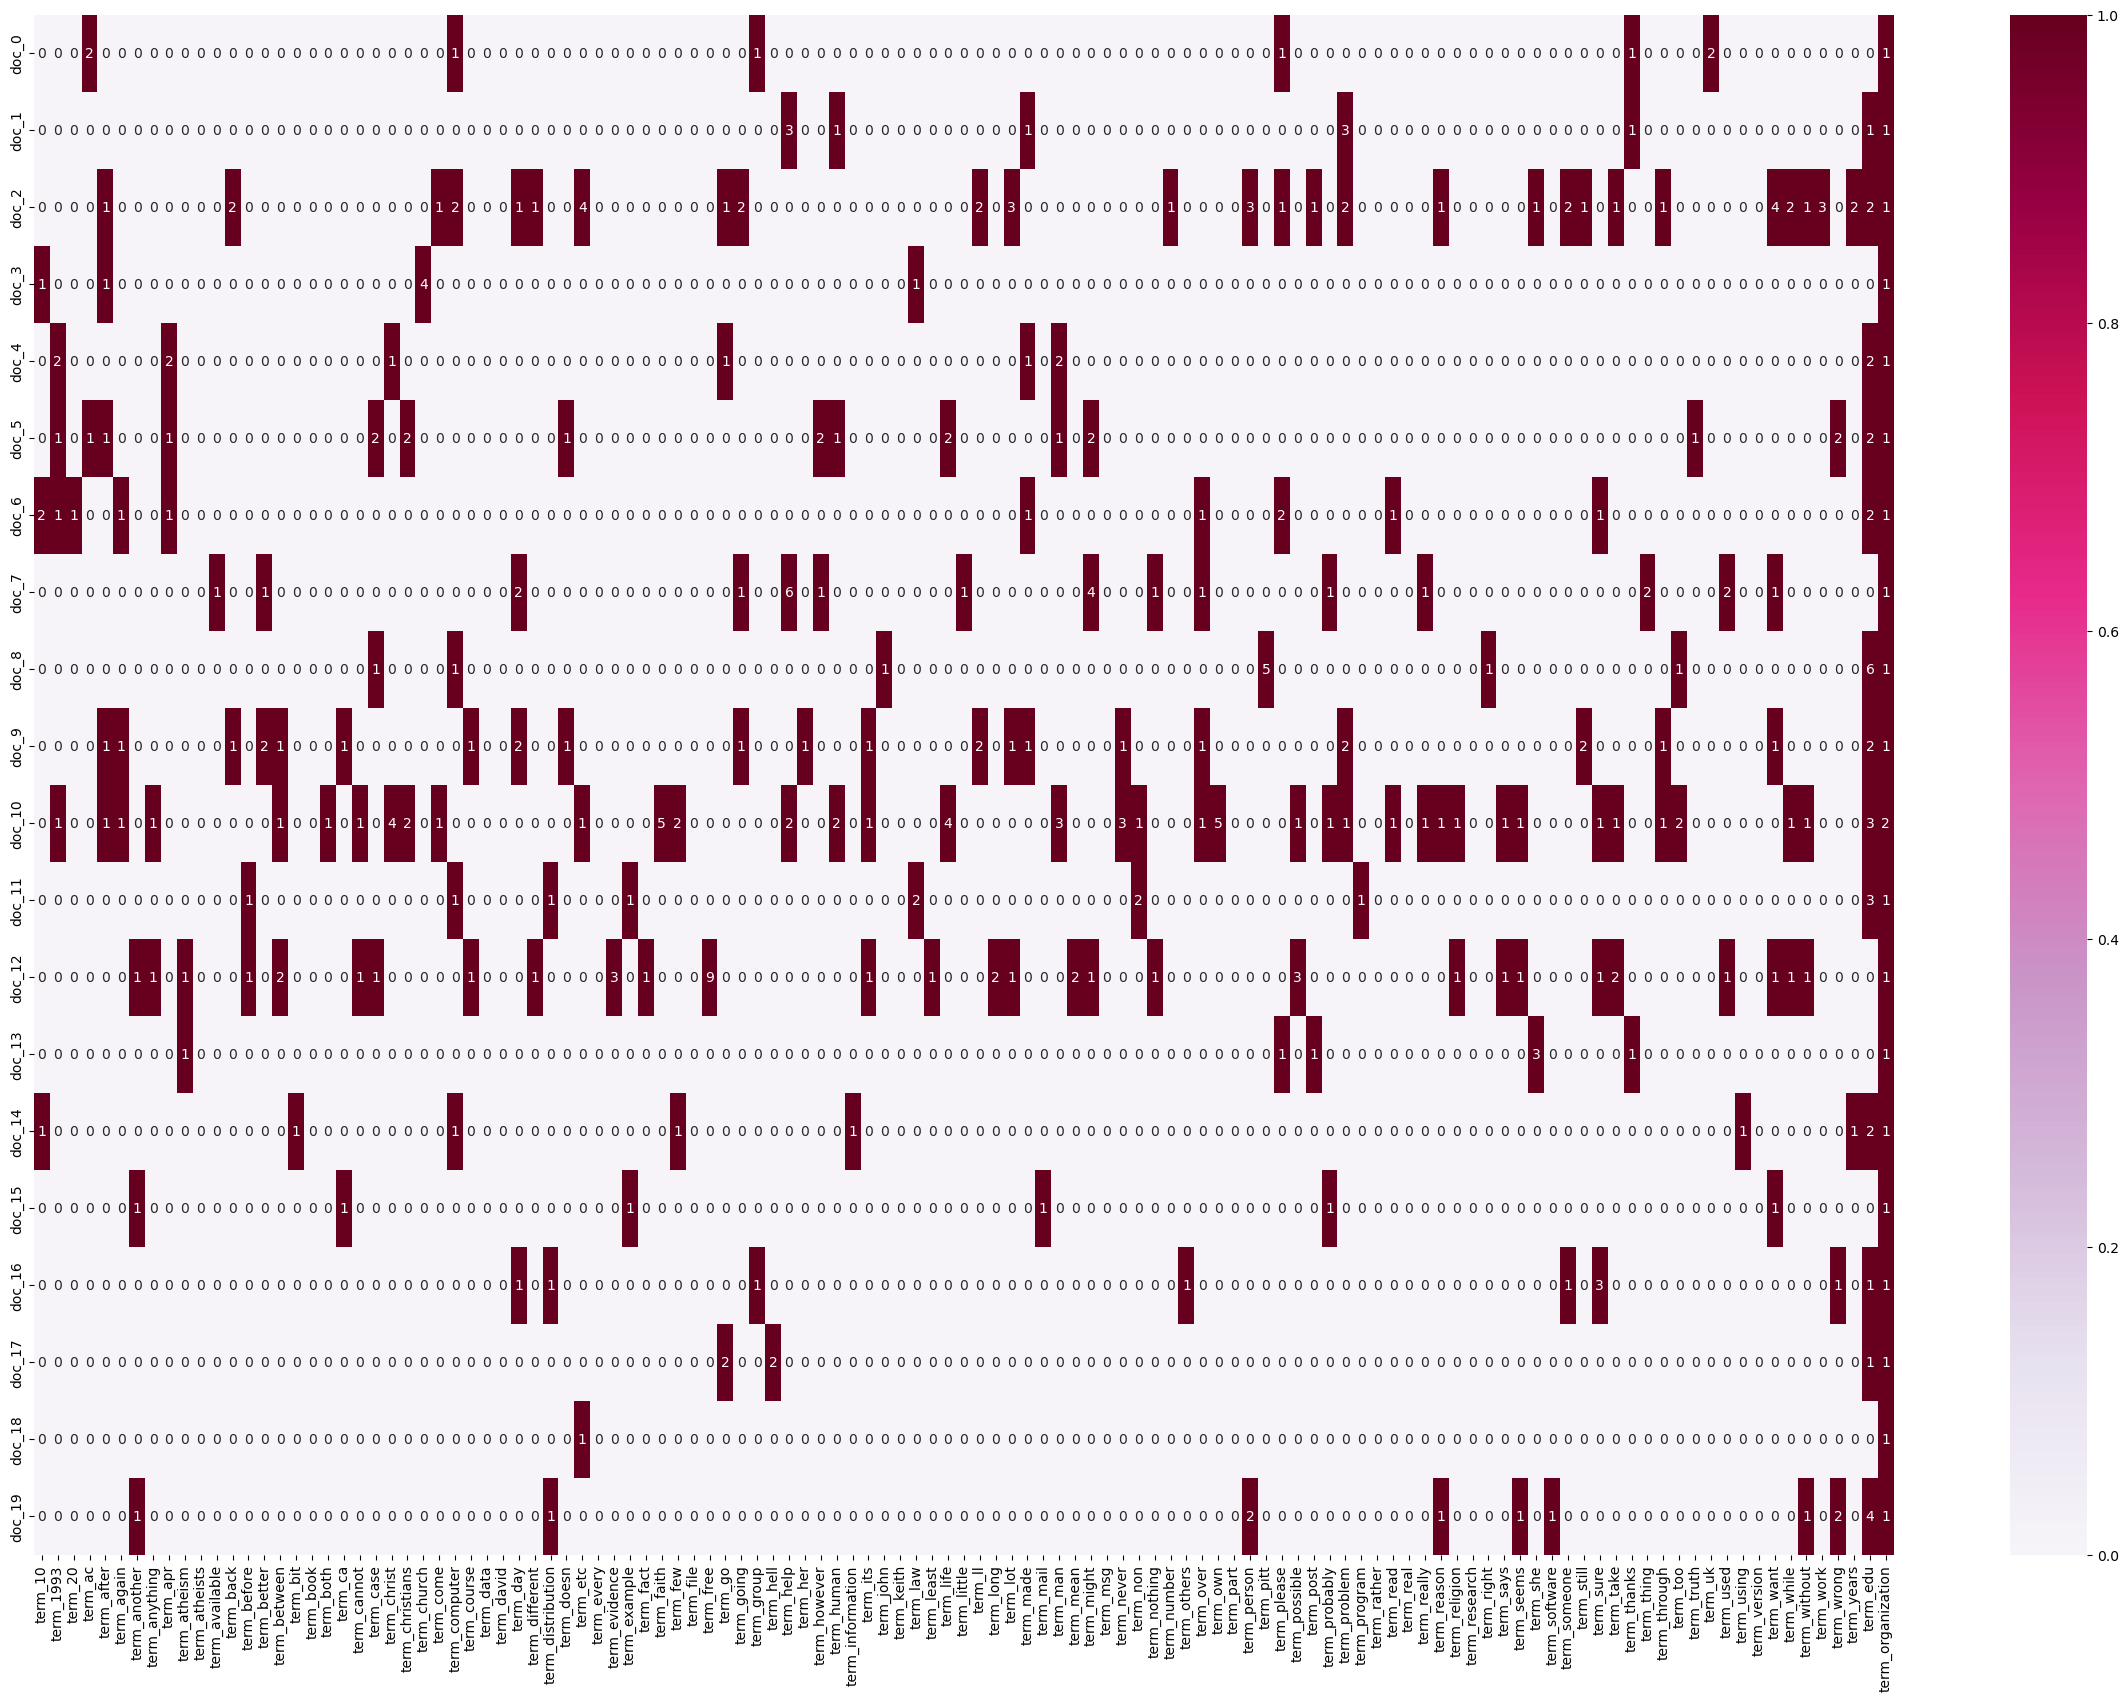

In [22]:
# draw the plot
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(30, 20))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

# Answer here

[Text(-200.0, 0, ''),
 Text(-150.0, 0, ''),
 Text(-100.0, 0, ''),
 Text(-50.0, 0, ''),
 Text(0.0, 0, ''),
 Text(50.0, 0, ''),
 Text(100.0, 0, ''),
 Text(150.0, 0, ''),
 Text(200.0, 0, ''),
 Text(250.0, 0, '')]

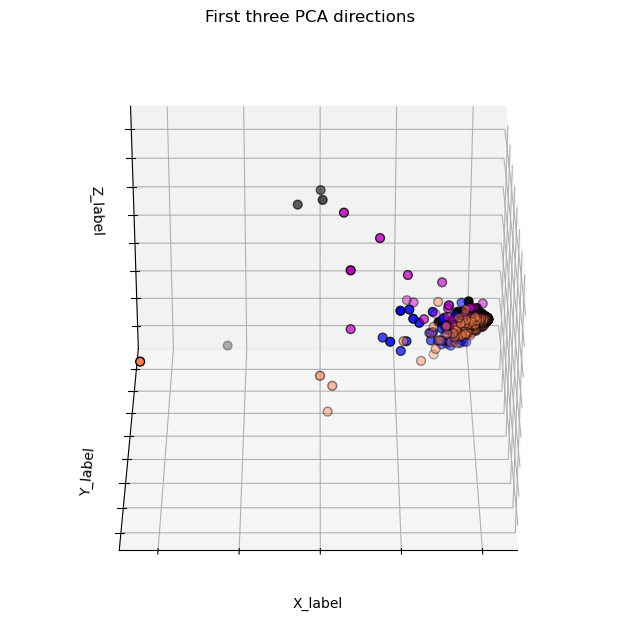

In [26]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=90, auto_add_to_figure=False)
fig.add_axes(ax)
X_reduced_three = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black', 'm']
for c, category in zip(col, categories):
    xs = X_reduced_three[X['category_name'] == category].T[0]
    ys = X_reduced_three[X['category_name'] == category].T[1]
    zs = X_reduced_three[X['category_name'] == category].T[2] 
    ax.scatter(xs, ys, zs, c=c,
               cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("X_label")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Y_label")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Z_label")
ax.w_zaxis.set_ticklabels([])

[Text(-200.0, 0, ''),
 Text(-150.0, 0, ''),
 Text(-100.0, 0, ''),
 Text(-50.0, 0, ''),
 Text(0.0, 0, ''),
 Text(50.0, 0, ''),
 Text(100.0, 0, ''),
 Text(150.0, 0, ''),
 Text(200.0, 0, ''),
 Text(250.0, 0, '')]

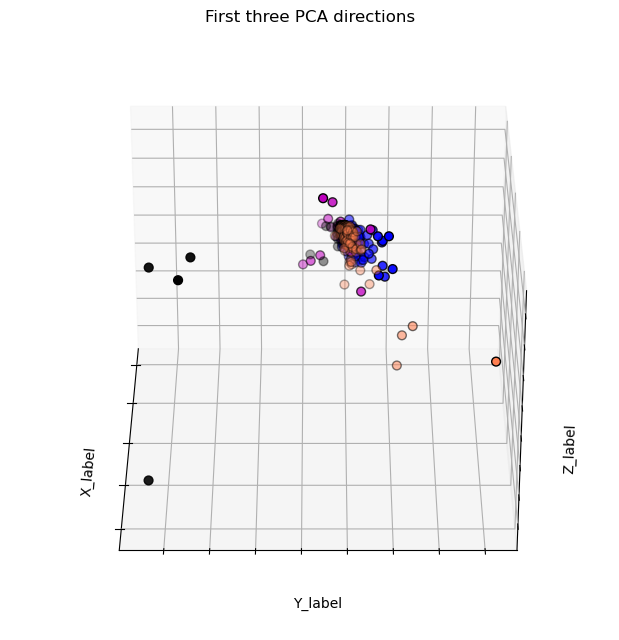

In [27]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=180, auto_add_to_figure=False)
fig.add_axes(ax)
X_reduced_three = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black', 'm']
for c, category in zip(col, categories):
    xs = X_reduced_three[X['category_name'] == category].T[0]
    ys = X_reduced_three[X['category_name'] == category].T[1]
    zs = X_reduced_three[X['category_name'] == category].T[2] 
    ax.scatter(xs, ys, zs, c=c,
               cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("X_label")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Y_label")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Z_label")
ax.w_zaxis.set_ticklabels([])

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

# Answer here


In [30]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

fig = make_subplots(rows=1, cols=1)
fig.add_trace(
    go.Bar(x=count_vect.get_feature_names()[:300],y=term_frequencies[:300], marker_color='steelblue'),
    row=1,col=1  
)

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,xanchor="right",x=1),
    height=600, width=3000, title_text="Interactive graph of Word Frequency(Feel free to zoom in and out!)")
fig.show()

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


# Answer here


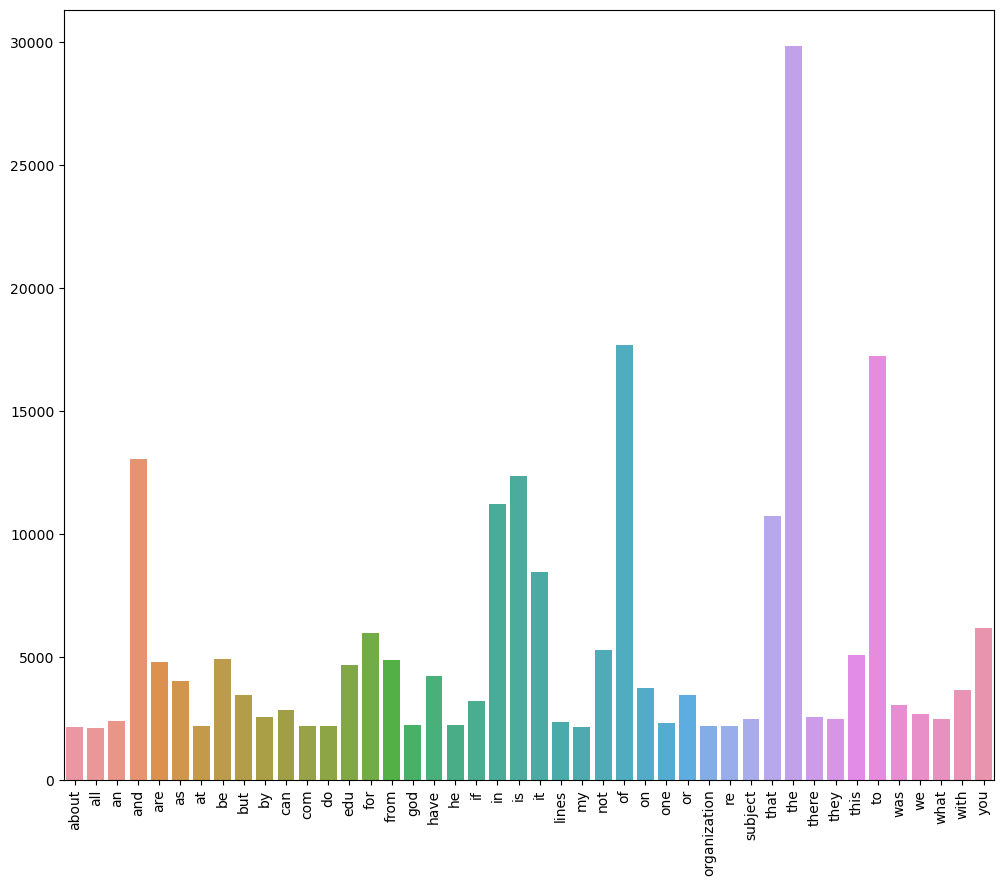

In [34]:
term_sum=np.asarray(X_counts.sum(axis=0))[0]
term_filter=term_sum>2000 # only remain those greater than 2000

index=[]
for i in enumerate(term_filter):
    if i[1]==True:
        index.append(i[0])

name=[]
for i in index:
    name.append(count_vect.get_feature_names_out()[i])

    
value=[]
for i in index:
    value.append(term_sum[i])

plt.subplots(figsize=(12, 10))
g = sns.barplot(x=name, 
            y=value)
g.set_xticklabels(name, rotation = 90);

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

# Answer here


In [35]:
df= pd.DataFrame({'name':count_vect.get_feature_names_out()[:300],'frequency':term_frequencies[:300]})
df.sort_values(ascending=False,by='frequency',inplace=True)
df.head()

,name,frequency
242,10,378
0,00,134
243,100,105
103,03,100
37,01,95


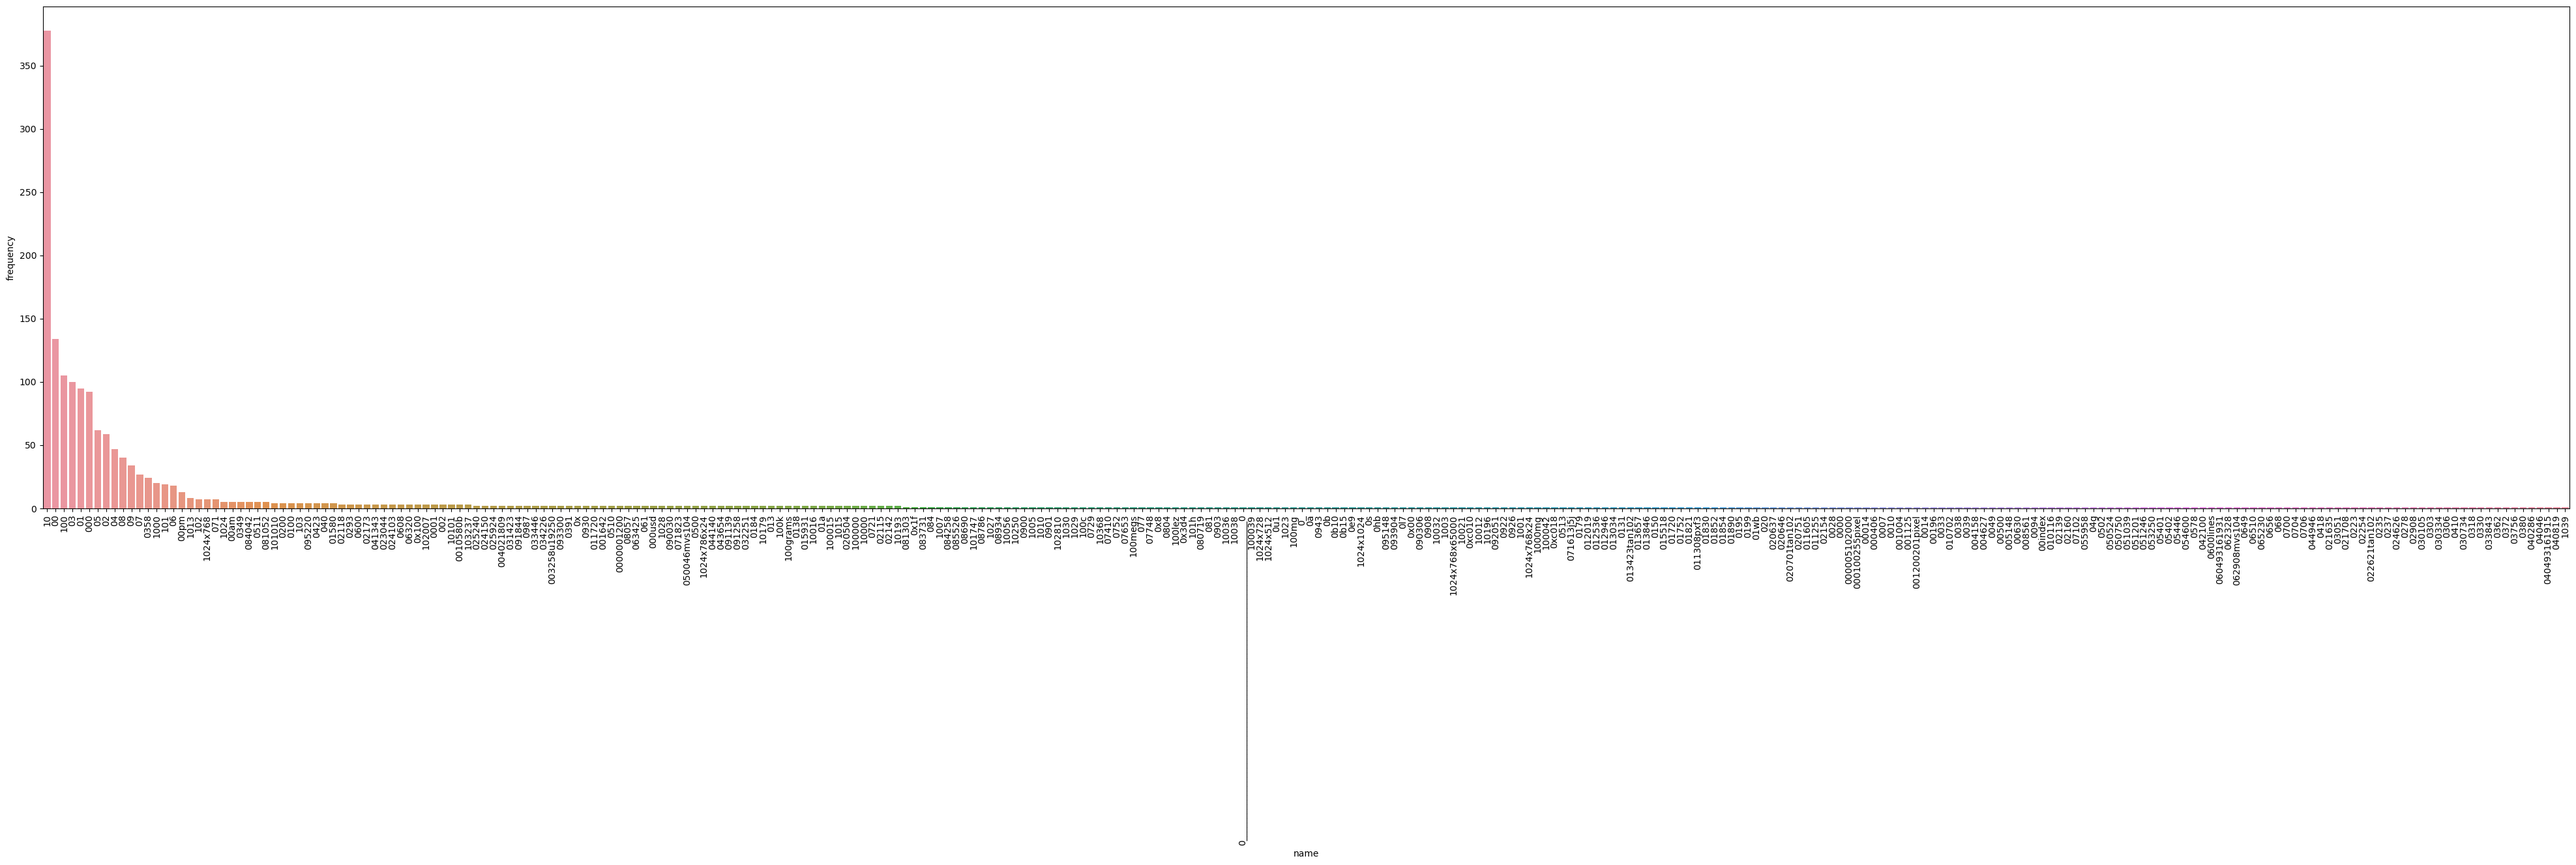

In [36]:
plt.subplots(figsize=(50, 10))
g = sns.barplot(x=df['name'], y=df['frequency'])
g.set_xticklabels(df['name'], rotation = 90);

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

# Answer here

NO, we cannot use category_name instead of category since category_name is 'str' type.

In [43]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,unigrams,bin_category,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]","[0, 0, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]","[0, 0, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]","[0, 0, 0, 0]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]","[0, 0, 0, 0]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]","[0, 0, 0, 0]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]","[0, 0, 0, 0]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]","[0, 0, 0, 0]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]","[0, 0, 0, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]","[0, 0, 0, 0]"


# 2. Second: 
follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

## 1. The Data

Provided in the file.

## 2. Data Preparation

In [46]:
data_amazon= pd.read_table(r'.\sentiment labelled sentences\amazon_cells_labelled.txt',header=None)
data_imdb= pd.read_table(r'.\sentiment labelled sentences\imdb_labelled.txt',header=None)
data_yelp= pd.read_table(r'.\sentiment labelled sentences\yelp_labelled.txt',header=None)
data_amazon.columns = data_imdb.columns = data_yelp.columns = ["text", "label"]


In [48]:
print(len(data_amazon))
print(len(data_imdb))
print(len(data_yelp))

1000
748
1000


## 3. Data Transformation

In [50]:
df=pd.concat([data_amazon,data_imdb,data_yelp],axis=0,ignore_index=True)
print(df.shape)
df

(2748, 2)


,text,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2743,I think food should have flavor and texture an...,0
2744,Appetite instantly gone.,0
2745,Overall I was not impressed and would not go b...,0
2746,"The whole experience was underwhelming, and I ...",0


## 4. Data Mining using Pandas

### 4.1 Missing Values

In [51]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,label
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


### 4.2 Dealing with Duplicate Data

In [52]:
sum(df.duplicated('text'))

17

In [53]:
df[df.duplicated('text')]

,text,label
285,Great phone!.,1
407,Works great.,1
524,Works great!.,1
543,Don't buy this product.,0
744,If you like a loud buzzing to override all you...,0
748,Does not fit.,0
778,This is a great deal.,1
792,Great Phone.,1
892,Excellent product for the price.,1
896,Great phone.,1


In [54]:
df.drop_duplicates(inplace=True)

In [55]:
len(df)

2731

## 5.  Data Preprocessing

### 5.1 Sampling

In [56]:
df_sample=df.sample(n=1000)

In [57]:
len(df_sample)

1000

In [58]:
df_sample[0:4]

,text,label
2539,Once your food arrives it's meh.,0
877,Excellent!.,1
2180,Service is quick and friendly.,1
1760,The cashier had no care what so ever on what I...,0


1    1376
0    1355
Name: label, dtype: int64


<AxesSubplot:title={'center':'Label distribution'}>

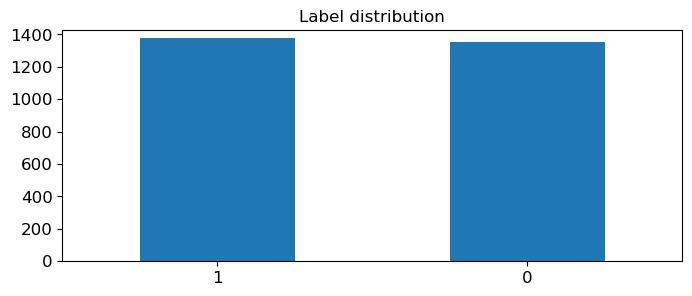

In [68]:
df_amount = df.label.value_counts()
print(df_amount)
df_amount.plot(kind = 'bar',
                                           title = 'Label distribution',
                                           ylim = [0, max(df_amount+50)], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

<AxesSubplot:title={'center':'Label distribution'}>

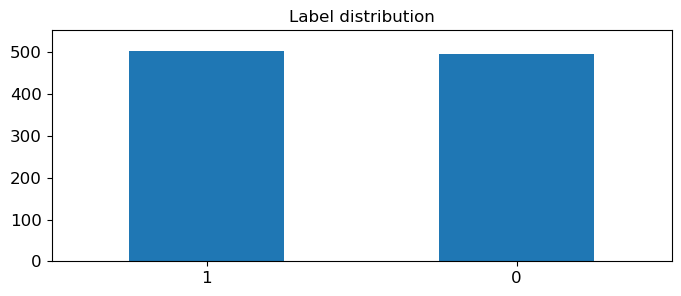

In [67]:
df_sample_amount = df_sample.label.value_counts()
df_sample_amount.plot(kind = 'bar',
                                           title = 'Label distribution',
                                           ylim = [0, max(df_sample_amount+50)], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

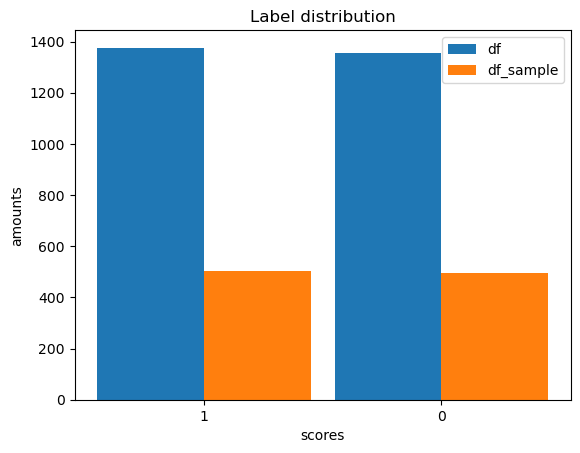

<Figure size 800x300 with 0 Axes>

In [81]:
df_axis = np.arange(2)
df_plt_width = 0.45
plt.bar(df_axis-df_plt_width/2, df_amount, df_plt_width, label = 'df')
plt.bar(df_axis+df_plt_width/2, df_sample_amount, df_plt_width, label = 'df_sample')
plt.xticks(df_axis, ('1', '0'))
plt.xlabel('scores')
plt.ylabel('amounts')
plt.title('Label distribution')
plt.legend()
plt.figure(figsize = (8,3))
plt.show()



### 5.2 Feature Creation

In [75]:
df['unigrams'] = df['text'].apply(lambda x: dmh.tokenize_text(x))

In [76]:
df[0:4]

,text,label,unigrams
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin..."


In [126]:
list(df[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

### 5.3 Feature subset selection

In [122]:
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.text)
print(df_counts[0])

  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1


In [112]:
df_counts.shape

(2731, 5155)

In [115]:
analyze = count_vect.build_analyzer()
analyze(df.text[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [116]:
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [132]:
print(len(count_vect.get_feature_names_out())) # total terms number
print(len(df.index)) # total docs number
print('-'*20)

term_sum = np.asarray(df_counts.sum(axis=0))[0] # terms
term_filter = term_sum > 100
# By trial and error, I found that the term_sum greater than 100 are most meaningful.

indexes = []
for i in enumerate(term_filter):
    if i[1] == True:
        indexes.append(i[0])
        print(i[0])

print('-'*20)
values = []
for i in indexes:
    values.append(count_vect.get_feature_names_out()[i])
    print(count_vect.get_feature_names_out()[i])



5155
2731
--------------------
179
214
216
273
297
314
373
416
637
1742
1822
1829
1883
1993
2023
2067
2113
2282
2314
2427
2432
2493
2638
2954
2982
3063
3097
3122
3124
3322
3351
3626
3994
4161
4529
4531
4545
4548
4558
4593
4609
4890
4968
4993
5015
5069
5138
--------------------
all
an
and
are
as
at
bad
be
but
film
food
for
from
good
great
had
have
if
in
is
it
just
like
movie
my
not
of
on
one
phone
place
really
service
so
that
the
there
they
this
time
to
very
was
we
were
with
you


In [133]:
# plot setting
plot_x = ["term_"+str(i) for i in values]
plot_y = ["doc_"+str(i) for i in list(df.index)[0:50]]
plot_z = []
for i in range(50):
    doc_freq = []
    for j in indexes:
        doc_freq.append(X_counts[i, j])
    plot_z.append(doc_freq)

len(plot_x)

47

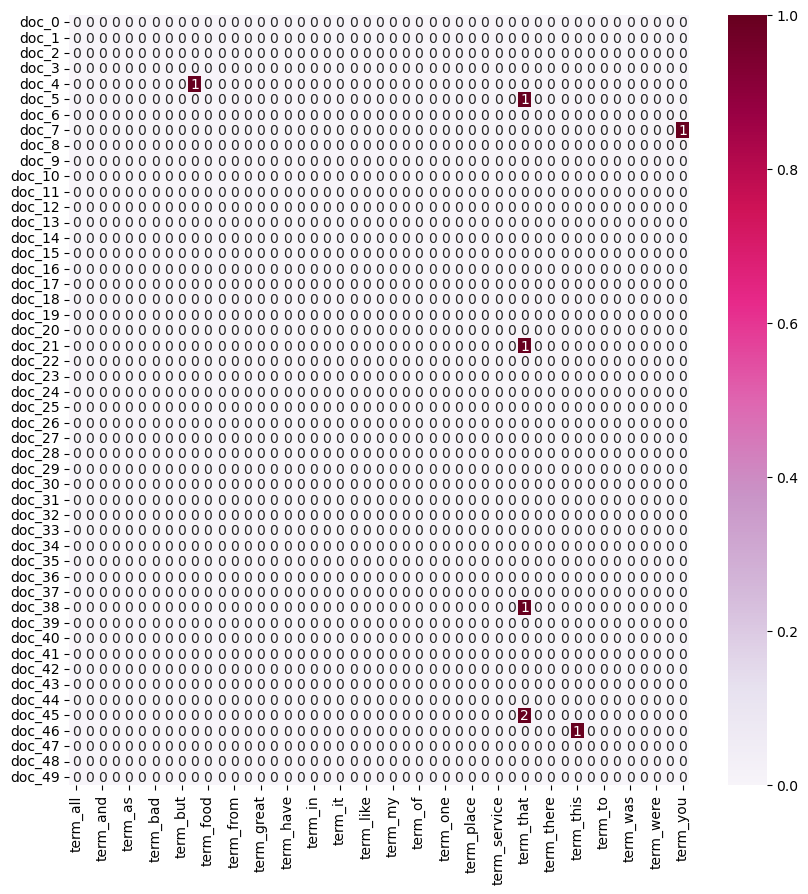

In [135]:
# draw the plot
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(10, 10))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### 5.4 Dimensionality Reduction

In [136]:
df_counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [137]:
df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())

In [138]:
df_reduced.shape

(2731, 2)

In [139]:
df_reduced[0:10,0:10].T[0]

array([ 0.72799562, -1.02331694, -0.28398826, -0.83362664, -0.14339797,
        0.55305269,  0.63565148, -0.69920585, -0.87082067, -0.42432045])

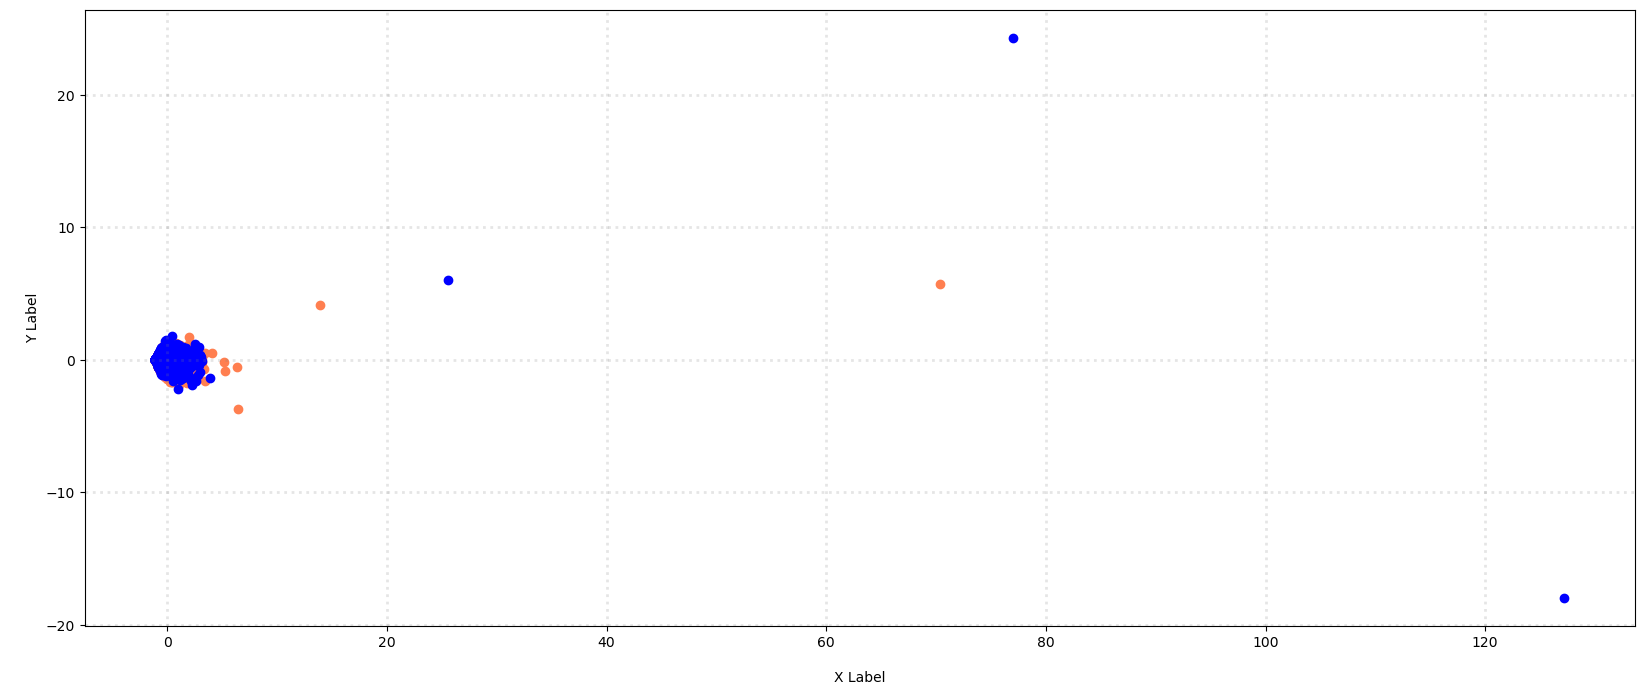

In [140]:
col = ['coral', 'blue']
labels=[1,0]

# plot
fig = plt.figure(figsize = (20,8))
ax = fig.subplots()

for c, label in zip(col, labels):
    xs = df_reduced[df['label'] == label].T[0]
    ys = df_reduced[df['label'] == label].T[1]

    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

[Text(-7.0, 0, ''),
 Text(-6.0, 0, ''),
 Text(-5.0, 0, ''),
 Text(-4.0, 0, ''),
 Text(-3.0, 0, ''),
 Text(-2.0, 0, ''),
 Text(-1.0, 0, ''),
 Text(0.0, 0, ''),
 Text(1.0, 0, ''),
 Text(2.0, 0, ''),
 Text(3.0, 0, '')]

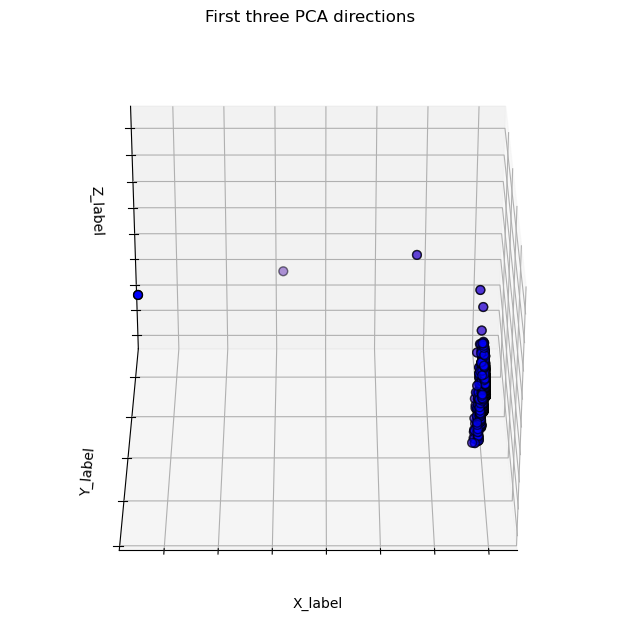

In [149]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=90, auto_add_to_figure=False)
fig.add_axes(ax)
df_reduced_three = PCA(n_components = 3).fit_transform(df_counts.toarray())

col = ['coral', 'blue']
labels=[1,0]
for c, category in zip(col, labels):
    xs = df_reduced_three[df['label'] == label].T[0]
    ys = df_reduced_three[df['label'] == label].T[1]
    zs = df_reduced_three[df['label'] == label].T[2] 
    ax.scatter(xs, ys, zs, c=c,
               cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("X_label")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Y_label")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Z_label")
ax.w_zaxis.set_ticklabels([])

[Text(-7.0, 0, ''),
 Text(-6.0, 0, ''),
 Text(-5.0, 0, ''),
 Text(-4.0, 0, ''),
 Text(-3.0, 0, ''),
 Text(-2.0, 0, ''),
 Text(-1.0, 0, ''),
 Text(0.0, 0, ''),
 Text(1.0, 0, ''),
 Text(2.0, 0, ''),
 Text(3.0, 0, '')]

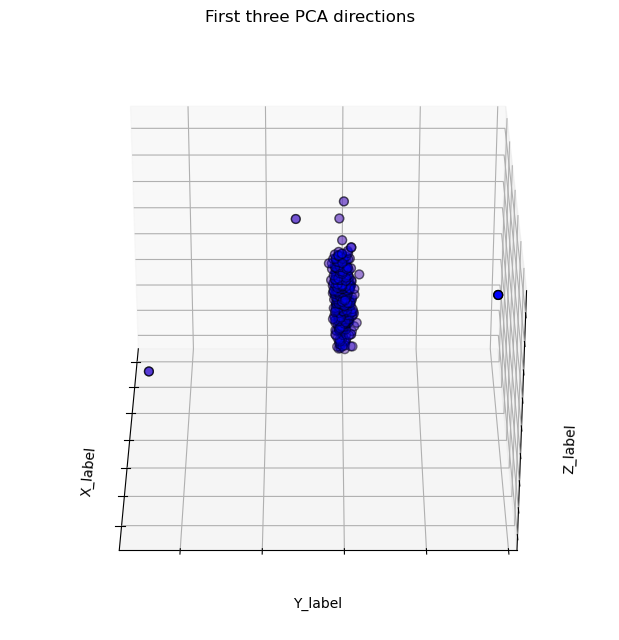

In [150]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=180, auto_add_to_figure=False)
fig.add_axes(ax)
df_reduced_three = PCA(n_components = 3).fit_transform(df_counts.toarray())

col = ['coral', 'blue']
labels=[1,0]
for c, category in zip(col, labels):
    xs = df_reduced_three[df['label'] == label].T[0]
    ys = df_reduced_three[df['label'] == label].T[1]
    zs = df_reduced_three[df['label'] == label].T[2] 
    ax.scatter(xs, ys, zs, c=c,
               cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("X_label")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Y_label")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Z_label")
ax.w_zaxis.set_ticklabels([])

### 5.5 Attribute Transformation / Aggregation


In [151]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

In [152]:
len(term_frequencies)

5155

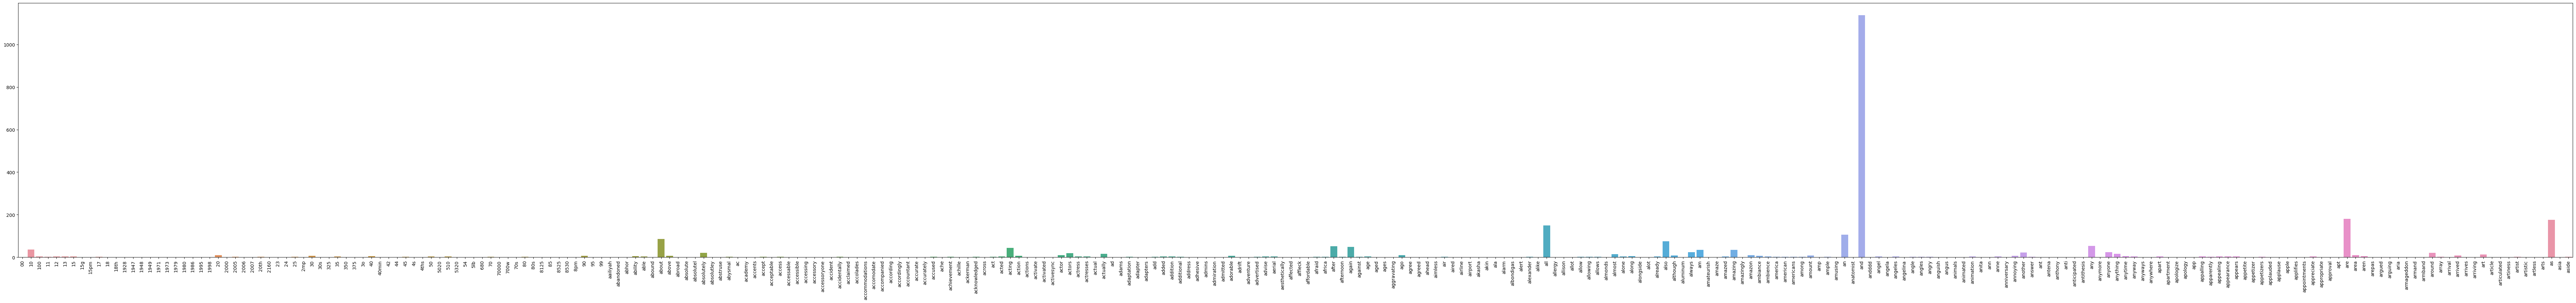

In [154]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

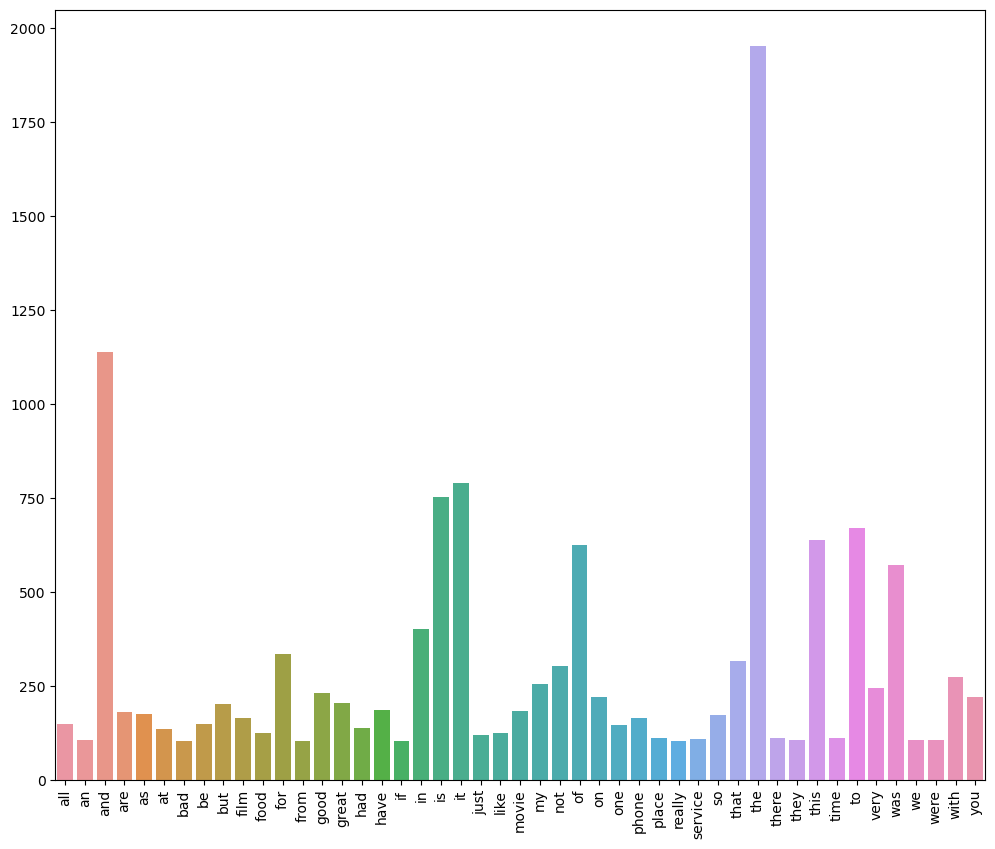

In [155]:
term_sum=np.asarray(df_counts.sum(axis=0))[0]
term_filter=term_sum>100 # only remain those greater than 100

index=[]
for i in enumerate(term_filter):
    if i[1]==True:
        index.append(i[0])

name=[]
for i in index:
    name.append(count_vect.get_feature_names_out()[i])

    
value=[]
for i in index:
    value.append(term_sum[i])

plt.subplots(figsize=(12, 10))
g = sns.barplot(x=name, 
            y=value)
g.set_xticklabels(name, rotation = 90);

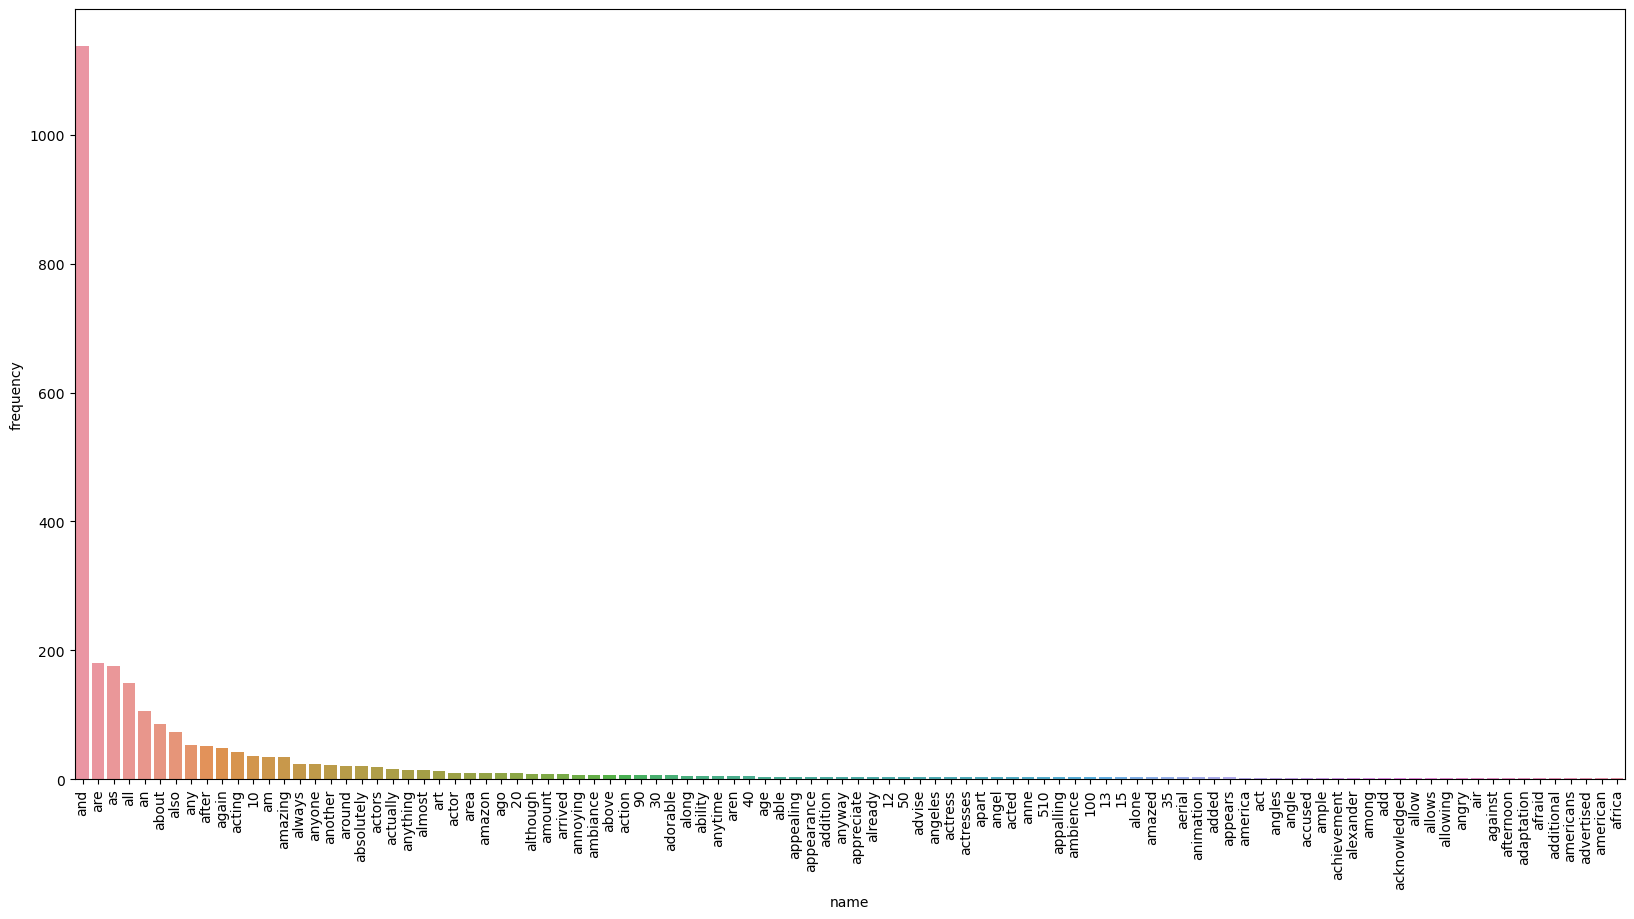

In [157]:
df_term= pd.DataFrame({'name':count_vect.get_feature_names_out()[:300],'frequency':term_frequencies[:300]})
df_term.sort_values(ascending=False,by='frequency',inplace=True)
df_term_100=df_term.iloc[0:100,:]

plt.subplots(figsize=(20, 10))
g = sns.barplot(x=df_term_100['name'],y=df_term_100['frequency'])
g.set_xticklabels(df_term_100['name'], rotation = 90);

### 5.6 Discretization and Binarization


In [158]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(df["label"])

LabelBinarizer()

In [159]:
mlb.classes_

array([0, 1], dtype=int64)

In [160]:
df['bin_label'] = mlb.transform(df['label']).tolist()

In [161]:
df.head()

,text,label,unigrams,bin_label
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,"[The, mic, is, great, .]",[1]


## 6. Data Exploration

In [162]:
# We retrieve 3 sentences for a random record, here, indexed at 123,132 and 233
document_to_transform_1 = []
random_record_1 = df.iloc[123]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[132]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[233]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [163]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['Bad Quality.']
['Headset works great & was packaged nicely to avoid any damage.']
['Great sound and service.']


In [164]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [165]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)
# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.158114
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


# 3. Third:
please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).

## Add new features

In [166]:
def get_length(df):
    return len(df['unigrams'])
df["length"] = df.apply(get_length, axis = 1)

In [167]:
df.head()

,text,label,unigrams,bin_label,length
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it...",[0],22
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]",[1],6
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]",[1],5
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin...",[0],13
4,The mic is great.,1,"[The, mic, is, great, .]",[1],5


## Check length of sentences in different labels
You can zoom in and zoom out in this interactive graph

In [169]:
df_negative = df[df["label"]==0]
df_positive = df[df["label"]==1]

In [170]:

fig = make_subplots(rows=2, cols=1, subplot_titles=("Length of Negative Sentences", "Length of Positive Sentences"))
fig.add_trace(
    go.Bar(name='Negative Sentences',y=df_negative['length'], marker_color='steelblue'),
    row=1,col=1  
)

fig.add_trace(
    go.Bar(name='Positive Sentences',y=df_positive['length'], marker_color='firebrick'),
    row=2,col=1
)

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,xanchor="right",x=1),
    height=600, width=5000, title_text="Length of Negative Sentences VS. Length of Positive Sentences")
fig.show()

## Generate TF-IDF Features

### Examples in official document

In [171]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
# stored as sparse matrix
print(X)

  (0, 1)	0.46979138557992045
  (0, 2)	0.5802858236844359
  (0, 6)	0.38408524091481483
  (0, 3)	0.38408524091481483
  (0, 8)	0.38408524091481483
  (1, 5)	0.5386476208856763
  (1, 1)	0.6876235979836938
  (1, 6)	0.281088674033753
  (1, 3)	0.281088674033753
  (1, 8)	0.281088674033753
  (2, 4)	0.511848512707169
  (2, 7)	0.511848512707169
  (2, 0)	0.511848512707169
  (2, 6)	0.267103787642168
  (2, 3)	0.267103787642168
  (2, 8)	0.267103787642168
  (3, 1)	0.46979138557992045
  (3, 2)	0.5802858236844359
  (3, 6)	0.38408524091481483
  (3, 3)	0.38408524091481483
  (3, 8)	0.38408524091481483


In [172]:
print(X.shape)
vectorizer.get_feature_names_out()

(4, 9)


array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

## Try by myself

In [177]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
TF_IDF = vectorizer.fit_transform(df["text"])

TF_IDF_result = pd.DataFrame(TF_IDF.toarray(), columns = vectorizer.get_feature_names_out())
TF_IDF_result

,00,10,100,11,12,13,15,15g,15pm,17,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## TF-IDF + Naive Bayes Classifier

In [178]:
TF_IDF_result['label']= df['label']
TF_IDF_result

,00,10,100,11,12,13,15,15g,15pm,17,...,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [179]:
# Check NA data
TF_IDF_result.isnull().apply(lambda x: dmh.check_missing_values(x)).loc[:,'label']

0    The amoung of missing records is: 
1                                    17
Name: label, dtype: object

In [180]:
# fill na in label
TF_IDF_result=TF_IDF_result.fillna(0).astype(int)
TF_IDF_result.isnull().apply(lambda x: dmh.check_missing_values(x)).loc[:,'label']

0    The amoung of missing records is: 
1                                     0
Name: label, dtype: object

In [181]:
# check 5 times
train_data, test_data = train_test_split(TF_IDF_result, random_state=123, train_size=0.8)
X_train = train_data.iloc[:, :-1]
y_train = train_data.loc[:, "label"]
X_test = test_data.iloc[:, :-1]
y_test = test_data.loc[:, "label"]

model = GaussianNB()
model.fit(X_train, y_train)

y_test_predict = model.predict(X_test)
# predict the proper value sum
correct_num = (y_test == y_test_predict).sum()      
acc = correct_num / y_test_predict.size
print(y_test)
print("="*30)
print(y_test_predict)
print("="*30)
print(f'Accuracy score: {acc*100:.2f}%')

2030    0
335     0
732     1
2510    0
179     0
       ..
2157    0
2239    1
683     1
987     0
1839    1
Name: label, Length: 547, dtype: int32
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1

## Word Frequency features + Naive Bayes Classifier

In [183]:
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.text)

word_freq_result = pd.DataFrame(df_counts.toarray(), columns = count_vect.get_feature_names_out())
word_freq_result['label']= df['label']
word_freq_result

,00,10,100,11,12,13,15,15g,15pm,17,...,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2728,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2729,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [184]:
# Check NA data
word_freq_result.isnull().apply(lambda x: dmh.check_missing_values(x)).loc[:,'label']

0    The amoung of missing records is: 
1                                    17
Name: label, dtype: object

In [185]:
# fill na in label
word_freq_result=word_freq_result.fillna(0).astype(int)
word_freq_result.isnull().apply(lambda x: dmh.check_missing_values(x)).loc[:,'label']

0    The amoung of missing records is: 
1                                     0
Name: label, dtype: object

In [186]:
# check 5 times
train_data, test_data = train_test_split(word_freq_result, random_state=123, train_size=0.8)
X_train = train_data.iloc[:, :-1]
y_train = train_data.loc[:, "label"]
X_test = test_data.iloc[:, :-1]
y_test = test_data.loc[:, "label"]

model = GaussianNB()
model.fit(X_train, y_train)

y_test_predict = model.predict(X_test)
# predict the proper value sum
correct_num = (y_test == y_test_predict).sum()      
acc = correct_num / y_test_predict.size
print(y_test)
print("="*30)
print(y_test_predict)
print("="*30)
print(f'Accuracy score: {acc*100:.2f}%')

2030    0
335     0
732     1
2510    0
179     0
       ..
2157    0
2239    1
683     1
987     0
1839    1
Name: label, Length: 547, dtype: int32
[1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1
 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1
 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1
 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1
 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1
 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1
 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 0

## Differences between TF-IDF & Word frequency
In this case, after comparing the accuracy of the two, Word Frequency has higher performance. However, compared to the general sum of word frequency, TF-IDF has a partial weighting (e.g., a token has a higher frequency in a single article but a lower frequency in other articles, it will be given a higher weighting) and will have a different ability to distinguish words. In this case, due to the very short length of a single article (see the plotly graph of length of sentences), it is difficult to see its distinctiveness.

# 4. Fourth: 
In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


### Too many low frequency terms and high frequency but pointless terms in Word_Count and TF-IDF features
Take HeatMap illustrated in class as example, the data set hasn't been filtered resulting pointless graph.

We can improve this situation my discovering frequency of each terms. Then, filter out the term we want to show up !

What we want to pursue is both the high frequency and meaningful terms.

### Meaningless graph
Some graphs made in class are more like the demo of function. They don't geuniely provide useful information about the data set.

We can either filter the original data set to construct graph or use some other plotting packages such as plotly.

The latter one mentioned above can construct interactive graph and provide some function like 'zoom in and out' to make us better gather information we need. 